In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df_base = pd.read_csv('../data/processed/data_processed_1990_2023.csv', index_col='fecha')
df_base.drop('target', axis=1, inplace=True)

In [33]:
df_base

,tmin,tmax,tmed,presMin,presMax,dir,velmedia,racha,sol,prec
fecha,,,,,,,,,,
1990-01-01,10.0,16.2,13.1,1016.2,1019.3,20.0,2.5,5.3,1.2,15.6
1990-01-02,7.6,14.6,11.1,1010.6,1019.3,20.0,1.7,15.6,0.8,26.1
1990-01-03,7.6,13.0,10.3,1008.1,1014.4,18.0,2.2,9.7,0.3,6.4
1990-01-04,4.4,14.8,9.6,1014.4,1023.3,31.0,2.2,7.2,4.9,0.0
1990-01-05,6.4,15.8,11.1,1023.1,1026.4,6.0,2.2,6.1,6.7,0.0
...,...,...,...,...,...,...,...,...,...,...
2023-03-04,6.8,17.9,12.4,1014.5,1017.6,99.0,1.9,5.0,5.2,0.0
2023-03-05,6.0,15.5,10.8,1011.0,1015.3,99.0,0.6,5.0,0.0,1.5
2023-03-06,10.3,15.9,13.1,1008.7,1013.4,21.0,1.9,8.3,0.0,3.3


In [34]:
df_base.index = pd.to_datetime(df_base.index)

<Figure size 2000x1500 with 0 Axes>

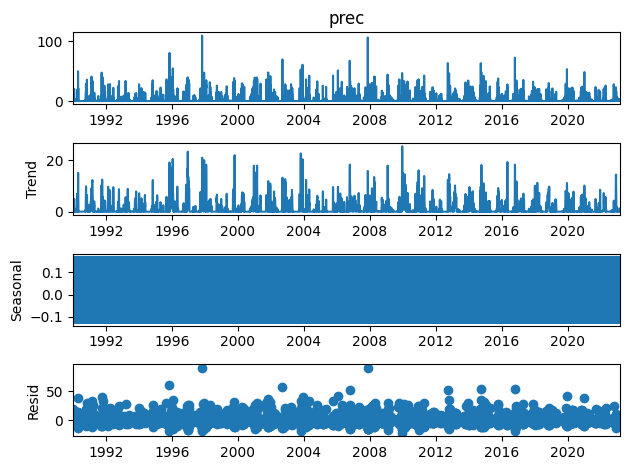

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Multiplicative Decomposition 
fig = plt.figure(figsize=(20, 15))
result_mul = seasonal_decompose(df_base['prec'], model = 'additive', extrapolate_trend = 'freq')
result_mul.plot()
plt.show()

In [25]:
from pmdarima.arima import auto_arima

arima_model = auto_arima(df_base['prec'])

In [26]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                12120
Model:               SARIMAX(1, 0, 5)   Log Likelihood              -36388.516
Date:                Sun, 12 Mar 2023   AIC                          72793.033
Time:                        22:08:41   BIC                          72852.253
Sample:                    01-01-1990   HQIC                         72812.888
                         - 03-08-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0504      0.013      3.784      0.000       0.024       0.077
ar.L1          0.9645      0.007    142.509      0.000       0.951       0.978
ma.L1         -0.6875      0.008    -88.887      0.000      -0.703      -0.672
ma.L2         -0.1388      0.007    -19.879      0.000      -0.153      -0.125
ma.L3          0.0017      0.007      0.235      0.814      -0.012       0.015
ma.L4         -0.0551      0.008     -6.925      0.000      -0.071      -0.039
ma.L5         -0.0208      0.007     -2.835      0.005      -0.035      -0.006
sigma2        23.7314      0.077    306.881      0.000      23.580      23.883
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           3076281.15
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                             6.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        79.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""